<a href="https://colab.research.google.com/github/aravindan155/AKumaranProjects/blob/main/EUvUSAmentalhealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading mental health prevalence data...
Attempting to load CSV file: 1- mental-illnesses-prevalence.csv
Trying encoding: utf-8
SUCCESS: CSV file loaded with utf-8 encoding!
Dataset shape: (6420, 8)

Column names:
['Entity', 'Code', 'Year', 'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized', 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized', 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized', 'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized', 'Eating disorders (share of population) - Sex: Both - Age: Age-standardized']

Processing European Union (27) data from rows 1982-2011...
Column A: Entity
Column B: Code

Sample of rows 1982-2011:
Column A values: ['European Union (27)' 'Fiji']
Column B values: [nan 'FJI']
Found 30 rows with 'European Union' - renaming to 'EU 27'

After processing EU data:
Unique entities: ['Afghanistan' 'Africa (IHME GBD)' 'Albania' 'Algeria'
 'A

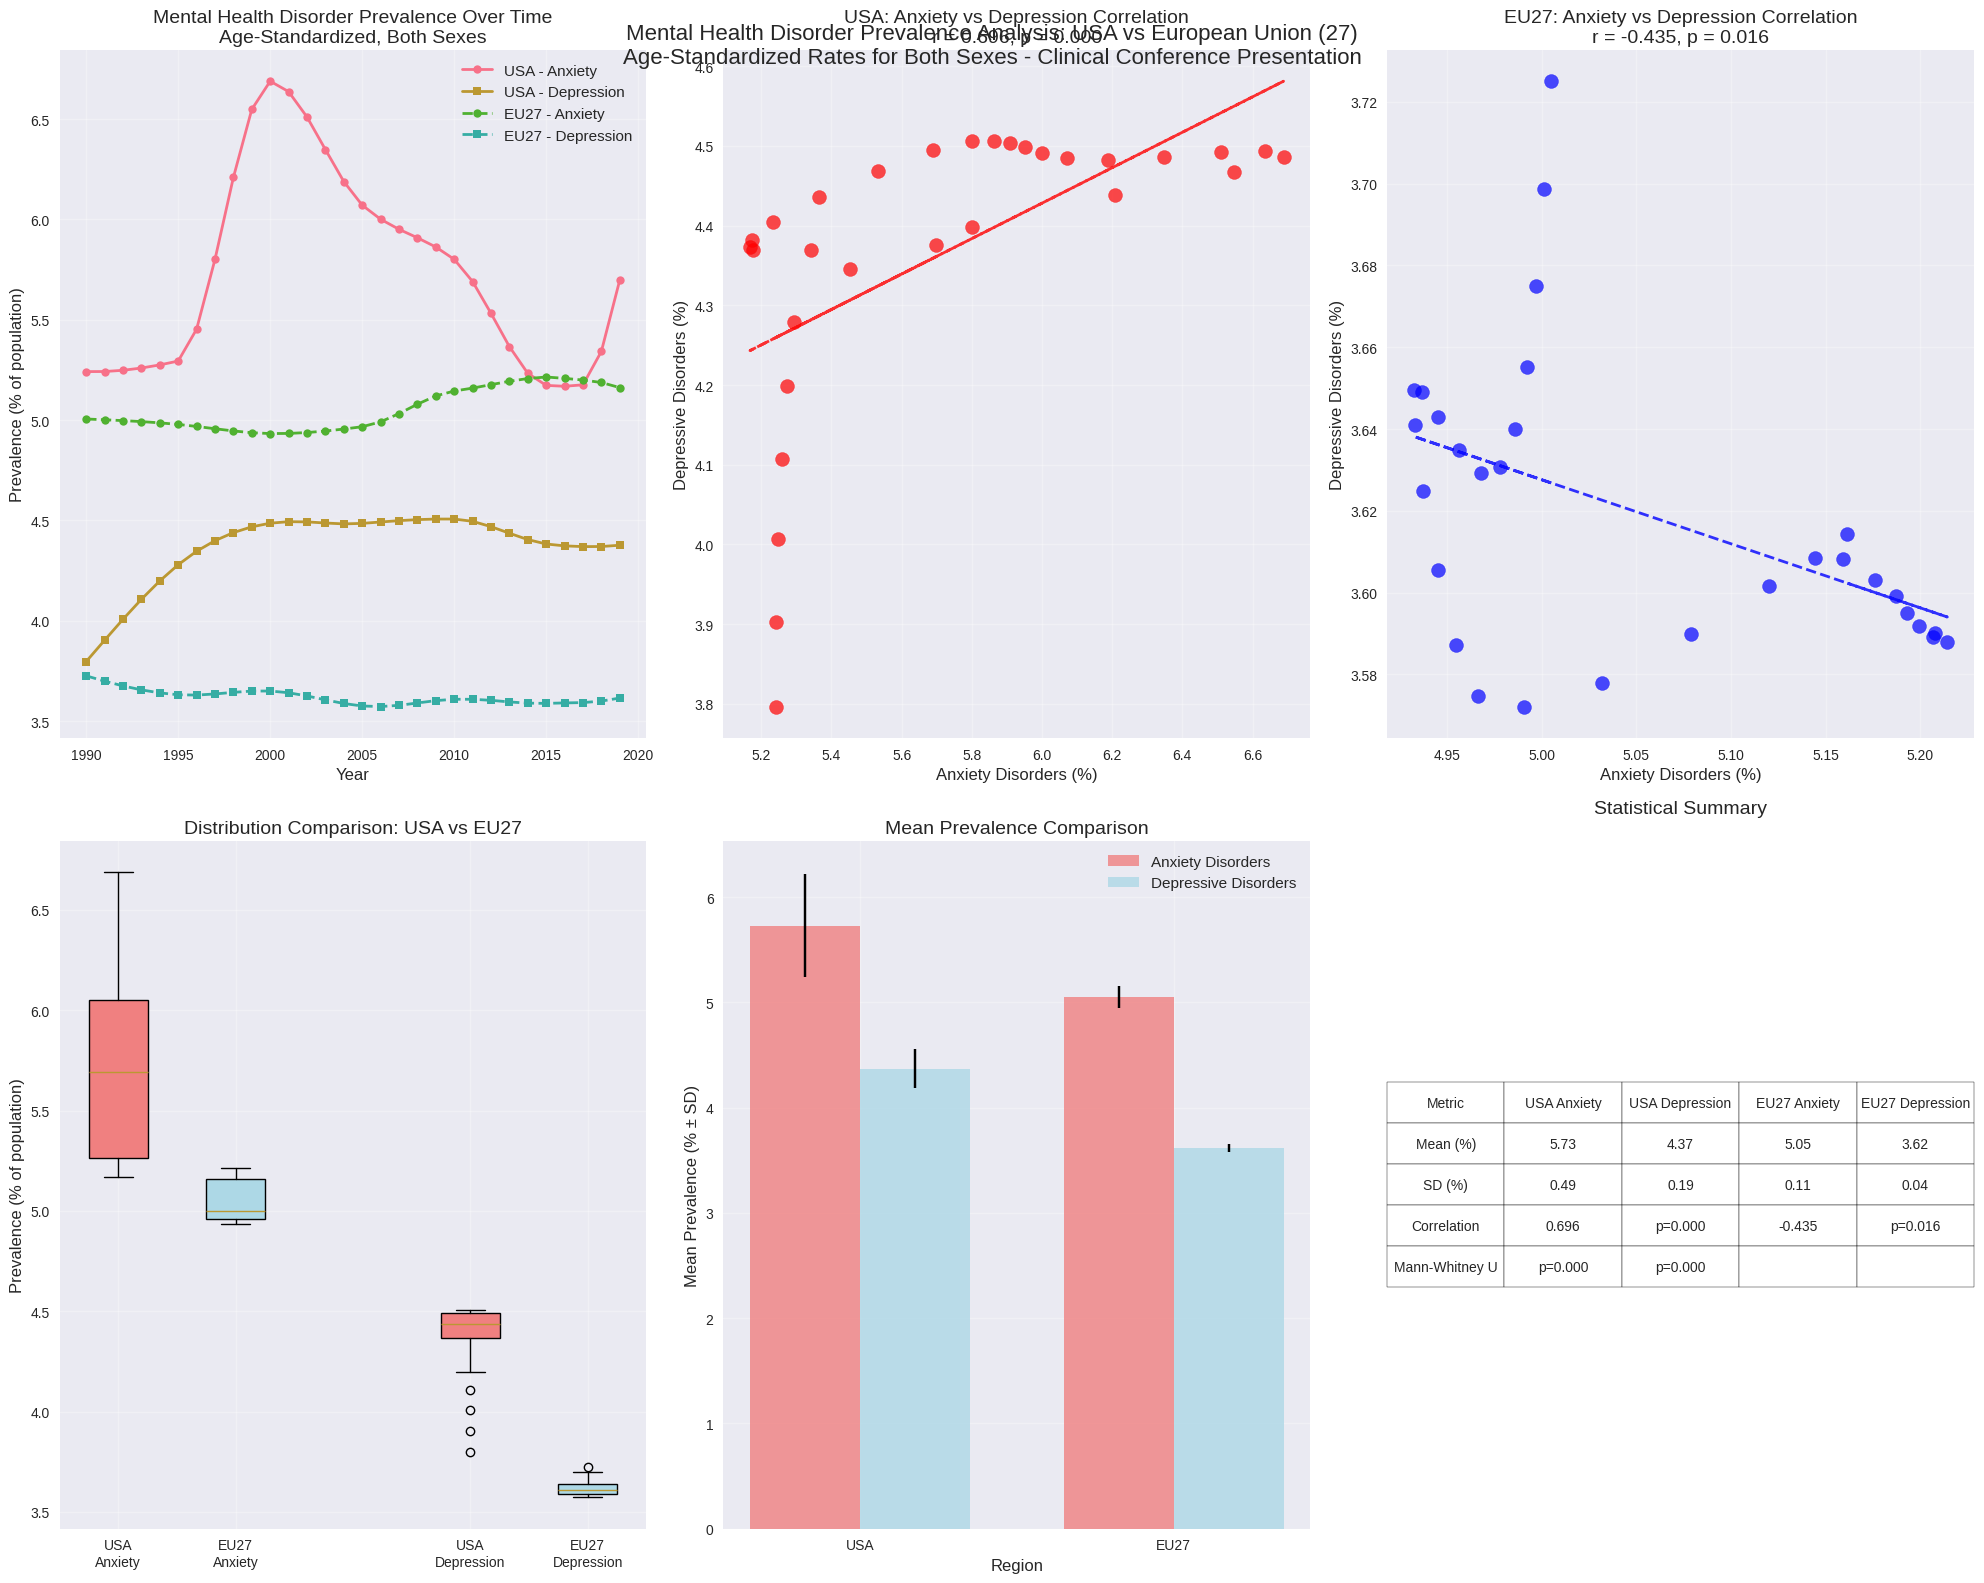


CLINICAL INTERPRETATION FOR PSYCHIATRISTS

KEY FINDINGS:

1. PREVALENCE COMPARISON:
   - USA Anxiety Disorders: 5.73% ± 0.49%
   - USA Depressive Disorders: 4.37% ± 0.19%
   - EU27 Anxiety Disorders: 5.05% ± 0.11%
   - EU27 Depressive Disorders: 3.62% ± 0.04%

2. CORRELATION ANALYSIS:
   - USA: Anxiety-Depression correlation = 0.696 (p=0.000)
   - EU27: Anxiety-Depression correlation = -0.435 (p=0.016)

3. STATISTICAL SIGNIFICANCE:
   - Anxiety disorders difference (USA vs EU27): p=0.000
   - Depressive disorders difference (USA vs EU27): p=0.000

4. TEMPORAL TRENDS:
   - USA Anxiety vs Time: r=-0.112 (p=0.555)
   - USA Depression vs Time: r=0.578 (p=0.001)
   - EU27 Anxiety vs Time: r=0.821 (p=0.000)
   - EU27 Depression vs Time: r=-0.772 (p=0.000)

CLINICAL IMPLICATIONS:
- Correlation analysis suggests relationship between anxiety and depressive disorders
- Consider comorbidity patterns when developing treatment protocols
- Regional differences may reflect healthcare system variatio

In [9]:
# Mental Health Trends Analysis: USA vs European Union (27 countries)
# Anxiety and Depressive Disorders Over Time
# Statistical Analysis for Psychiatrist Conference

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, spearmanr, shapiro, mannwhitneyu, wilcoxon
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set up plotting parameters for professional presentation
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 11

# Load and prepare the data
print("Loading mental health prevalence data...")

# For Google Colab - upload file if not found
import os
from google.colab import files

# Updated file path for CSV file
file_path = '1- mental-illnesses-prevalence.csv'

# Check if file exists, if not prompt for upload
if not os.path.exists(file_path):
    print("CSV file not found. Please upload your CSV file.")
    print("Click 'Choose Files' and select your '1- mental-illnesses-prevalence.csv' file:")
    uploaded = files.upload()

    # Get the uploaded filename
    uploaded_filename = list(uploaded.keys())[0]
    print(f"File '{uploaded_filename}' uploaded successfully!")

    # Use the uploaded filename
    file_path = uploaded_filename

# Load the CSV data
try:
    print(f"Attempting to load CSV file: {file_path}")

    # Try different encodings for CSV files
    encodings_to_try = ['utf-8', 'latin-1', 'cp1252', 'iso-8859-1']

    for encoding in encodings_to_try:
        try:
            print(f"Trying encoding: {encoding}")
            df = pd.read_csv(file_path, encoding=encoding)
            print(f"SUCCESS: CSV file loaded with {encoding} encoding!")
            break
        except Exception as e:
            print(f"Failed with {encoding}: {str(e)[:100]}...")
            continue
    else:
        raise Exception("Unable to load CSV with any encoding")

    print("Dataset shape:", df.shape)
    print("\nColumn names:")
    print(df.columns.tolist())

    # Handle the European Union (27) data that's split across columns A and B
    print(f"\nProcessing European Union (27) data from rows 1982-2011...")

    # Check if we need to combine columns for EU data
    # Look for European Union data that might be split
    if len(df.columns) >= 2:
        col_a = df.columns[0]  # Column A (should contain "European")
        col_b = df.columns[1]  # Column B (should contain "Union (27)")

        print(f"Column A: {col_a}")
        print(f"Column B: {col_b}")

        # Create a combined entity name for rows 1982-2011 where data is split
        df_copy = df.copy()

        # Check rows 1982-2011 (adjusting for 0-based indexing)
        start_row = 1981  # Row 1982 in 1-based indexing
        end_row = 2010    # Row 2011 in 1-based indexing

        if len(df) > end_row:
            # Check if these rows have the split EU data
            sample_rows = df.iloc[start_row:end_row+1]
            print(f"\nSample of rows {start_row+1}-{end_row+1}:")
            print(f"Column A values: {sample_rows[col_a].unique()[:5]}")
            print(f"Column B values: {sample_rows[col_b].unique()[:5]}")

            # Combine the columns for EU data in these rows
            for idx in range(start_row, min(end_row+1, len(df))):
                val_a = str(df.iloc[idx][col_a]).strip() if pd.notna(df.iloc[idx][col_a]) else ""
                val_b = str(df.iloc[idx][col_b]).strip() if pd.notna(df.iloc[idx][col_b]) else ""

                # If both columns have data that looks like it should be combined
                if val_a and val_b and ('European' in val_a or 'Union' in val_b):
                    combined_name = f"{val_a} {val_b}".strip()
                    df.iloc[idx, 0] = "EU 27"  # Set standardized name
                    print(f"Row {idx+1}: Combined '{val_a}' + '{val_b}' -> 'EU 27'")

        # Also look for any existing "European Union" entities and rename them
        entity_col = df.columns[0]  # Assuming first column is Entity
        eu_mask = df[entity_col].str.contains('European Union', case=False, na=False)
        if eu_mask.any():
            print(f"Found {eu_mask.sum()} rows with 'European Union' - renaming to 'EU 27'")
            df.loc[eu_mask, entity_col] = "EU 27"

    print(f"\nAfter processing EU data:")
    print(f"Unique entities: {df[df.columns[0]].unique()[:10]}")

except Exception as e:
    print(f"Error loading CSV file: {e}")
    print("Please make sure you uploaded a valid CSV file")
    print("You can try opening the file in Excel and saving it as a new CSV if there are issues")
    raise

# Filter for USA and EU 27 ONLY
target_entities = ['United States', 'EU 27']
df_filtered = df[df[df.columns[0]].isin(target_entities)].copy()

print(f"\nFiltered data shape: {df_filtered.shape}")
print(f"Entities found: {df_filtered[df_filtered.columns[0]].unique()}")

# If exact names not found, let's search for similar entities
if df_filtered.empty or len(df_filtered[df_filtered.columns[0]].unique()) < 2:
    print(f"\nExact entity names not found. Searching for similar entities...")
    entity_col = df.columns[0]
    all_entities = df[entity_col].unique()

    # Look for USA variants
    usa_entities = [entity for entity in all_entities if 'United States' in str(entity) or 'USA' in str(entity) or str(entity) == 'US']
    print(f"USA-related entities found: {usa_entities}")

    # Look for EU variants (including our newly created EU 27)
    eu_entities = [entity for entity in all_entities if 'EU 27' in str(entity) or 'European Union' in str(entity) or 'EU' in str(entity)]
    print(f"EU-related entities found: {eu_entities}")

    # Use the best matches
    actual_entities = []
    if usa_entities:
        actual_entities.append(usa_entities[0])
        print(f"Using '{usa_entities[0]}' for USA data")
    if eu_entities:
        actual_entities.append(eu_entities[0])
        print(f"Using '{eu_entities[0]}' for EU data")

    if actual_entities:
        print(f"\nUsing entities: {actual_entities}")
        df_filtered = df[df[entity_col].isin(actual_entities)].copy()
    else:
        print(f"\nNo matching entities found. Available entities include:")
        print(f"First 20 entities: {list(all_entities[:20])}")

if df_filtered.empty:
    print("ERROR: No data found for USA or EU entities. Please check entity names in your dataset.")
    print("The analysis cannot proceed without the target entities.")
    raise ValueError("No target entities found in dataset")

print(f"Year range in filtered data: {df_filtered['Year'].min()} - {df_filtered['Year'].max()}")

# Rename columns for clarity
column_mapping = {
    'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized': 'Anxiety_Disorders',
    'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depressive_Disorders'
}

# Check if columns exist and rename
for old_name, new_name in column_mapping.items():
    if old_name in df_filtered.columns:
        df_filtered = df_filtered.rename(columns={old_name: new_name})
        print(f"Renamed '{old_name}' to '{new_name}'")
    else:
        print(f"Warning: Column '{old_name}' not found in dataset")

# Create separate dataframes for each entity
entity_col = df_filtered.columns[0]  # First column should be the entity column

usa_data = df_filtered[df_filtered[entity_col].str.contains('United States|USA|US', case=False, na=False)].copy()
eu_data = df_filtered[df_filtered[entity_col].str.contains('EU 27|European Union', case=False, na=False)].copy()

print(f"\nUSA data points: {len(usa_data)}")
print(f"EU data points: {len(eu_data)}")

# If still empty, try exact matches with the entities we found
if len(usa_data) == 0 or len(eu_data) == 0:
    unique_entities = df_filtered[entity_col].unique()
    print(f"Available entities for assignment: {unique_entities}")

    if len(unique_entities) >= 2:
        # Try to intelligently assign based on names
        for entity in unique_entities:
            if any(term in str(entity).lower() for term in ['united states', 'usa', 'us']):
                usa_data = df_filtered[df_filtered[entity_col] == entity].copy()
                print(f"Assigned '{entity}' as USA data ({len(usa_data)} points)")
            elif any(term in str(entity).lower() for term in ['eu', 'european', 'union']):
                eu_data = df_filtered[df_filtered[entity_col] == entity].copy()
                print(f"Assigned '{entity}' as EU data ({len(eu_data)} points)")

# Focus ONLY on anxiety, depression, and year measures for USA and EU
print(f"\nFOCUSING ANALYSIS ON USA AND EU 27 DATA ONLY")
print(f"Variables: Anxiety Disorders, Depressive Disorders, Year")

# Remove any rows with missing values in these specific columns
usa_data = usa_data.dropna(subset=['Anxiety_Disorders', 'Depressive_Disorders', 'Year'])
eu_data = eu_data.dropna(subset=['Anxiety_Disorders', 'Depressive_Disorders', 'Year'])

print(f"\nFinal dataset after filtering for complete cases:")
print(f"USA data points: {len(usa_data)}")
print(f"EU 27 data points: {len(eu_data)}")

# Show the actual data we're analyzing
if len(usa_data) > 0:
    usa_entity_name = usa_data[entity_col].iloc[0]
    print(f"\nUSA data (entity: {usa_entity_name}):")
    print(usa_data[['Year', 'Anxiety_Disorders', 'Depressive_Disorders']].to_string(index=False))
else:
    print("\nNo valid USA data found after filtering")

if len(eu_data) > 0:
    eu_entity_name = eu_data[entity_col].iloc[0]
    print(f"\nEU 27 data (entity: {eu_entity_name}):")
    print(eu_data[['Year', 'Anxiety_Disorders', 'Depressive_Disorders']].to_string(index=False))
else:
    print("\nNo valid EU 27 data found after filtering")

# Statistical Analysis Functions
def test_normality(data, variable_name, entity_name):
    """Test for normality using Shapiro-Wilk test - ONLY for USA and EU anxiety/depression data"""
    if len(data) < 3:
        print(f"\nNormality test for {variable_name} in {entity_name}:")
        print("Cannot test normality: need at least 3 data points")
        return False

    statistic, p_value = shapiro(data)
    print(f"\nNormality test for {variable_name} in {entity_name}:")
    print(f"Shapiro-Wilk statistic: {statistic:.4f}")
    print(f"P-value: {p_value:.4f}")

    if p_value > 0.05:
        print("Data appears to be normally distributed (p > 0.05)")
        return True
    else:
        print("Data does NOT appear to be normally distributed (p ≤ 0.05)")
        return False

def calculate_correlations(data, entity_name):
    """Calculate correlations - FOCUSED ONLY on USA and EU anxiety/depression data"""

    # Check if we have enough data points
    if len(data) < 2:
        print(f"\n{'='*50}")
        print(f"CORRELATION ANALYSIS FOR {entity_name.upper()}")
        print(f"{'='*50}")
        print(f"ERROR: Insufficient data points ({len(data)}). Need at least 2 data points for correlation analysis.")
        print("Skipping statistical analysis for this entity.")
        return None

    # Extract ONLY the anxiety, depression, and year data for this entity
    anxiety = data['Anxiety_Disorders'].values
    depression = data['Depressive_Disorders'].values
    years = data['Year'].values

    print(f"\n{'='*50}")
    print(f"CORRELATION ANALYSIS FOR {entity_name.upper()}")
    print(f"ENTITY: {data['Entity'].iloc[0]}")
    print(f"{'='*50}")
    print(f"Number of data points: {len(data)}")
    print(f"Year range: {years.min()} - {years.max()}")
    print(f"Anxiety range: {anxiety.min():.2f}% - {anxiety.max():.2f}%")
    print(f"Depression range: {depression.min():.2f}% - {depression.max():.2f}%")

    # Test normality ONLY for anxiety and depression in this entity
    anxiety_normal = test_normality(anxiety, "Anxiety Disorders", entity_name)
    depression_normal = test_normality(depression, "Depressive Disorders", entity_name)

    # Pearson correlation between anxiety and depression
    pearson_corr, pearson_p = pearsonr(anxiety, depression)
    print(f"\nAnxiety-Depression Pearson correlation: {pearson_corr:.4f} (p={pearson_p:.4f})")

    # Spearman correlation between anxiety and depression
    spearman_corr, spearman_p = spearmanr(anxiety, depression)
    print(f"Anxiety-Depression Spearman correlation: {spearman_corr:.4f} (p={spearman_p:.4f})")

    # Correlation with time (year)
    pearson_time_anxiety, pearson_time_anxiety_p = pearsonr(years, anxiety)
    pearson_time_depression, pearson_time_depression_p = pearsonr(years, depression)

    print(f"\nTemporal correlations:")
    print(f"Anxiety vs Year: r={pearson_time_anxiety:.4f} (p={pearson_time_anxiety_p:.4f})")
    print(f"Depression vs Year: r={pearson_time_depression:.4f} (p={pearson_time_depression_p:.4f})")

    # Recommend appropriate test based on normality
    if anxiety_normal and depression_normal:
        print(f"\nRecommendation: Use Pearson correlation (both variables normally distributed)")
        recommended_corr = pearson_corr
        recommended_p = pearson_p
    else:
        print(f"\nRecommendation: Use Spearman correlation (non-parametric, more robust)")
        recommended_corr = spearman_corr
        recommended_p = spearman_p

    print(f"Recommended correlation: {recommended_corr:.4f} (p={recommended_p:.4f})")

    return {
        'pearson_corr': pearson_corr, 'pearson_p': pearson_p,
        'spearman_corr': spearman_corr, 'spearman_p': spearman_p,
        'recommended_corr': recommended_corr, 'recommended_p': recommended_p,
        'anxiety_normal': anxiety_normal, 'depression_normal': depression_normal,
        'time_anxiety_corr': pearson_time_anxiety, 'time_anxiety_p': pearson_time_anxiety_p,
        'time_depression_corr': pearson_time_depression, 'time_depression_p': pearson_time_depression_p
    }

# Perform statistical analysis
usa_stats = calculate_correlations(usa_data, "United States")
eu_stats = calculate_correlations(eu_data, "European Union (27)")

# Only proceed with comparative analysis if both datasets have valid data
if usa_stats is not None and eu_stats is not None and len(usa_data) >= 2 and len(eu_data) >= 2:

    # Compare USA vs EU using appropriate non-parametric tests
    print(f"\n{'='*60}")
    print("COMPARATIVE ANALYSIS: USA vs EUROPEAN UNION")
    print(f"{'='*60}")

    # Mann-Whitney U test for independent samples
    usa_anxiety = usa_data['Anxiety_Disorders'].values
    eu_anxiety = eu_data['Anxiety_Disorders'].values
    usa_depression = usa_data['Depressive_Disorders'].values
    eu_depression = eu_data['Depressive_Disorders'].values

    # Test for differences in anxiety disorders
    anxiety_u_stat, anxiety_u_p = mannwhitneyu(usa_anxiety, eu_anxiety, alternative='two-sided')
    print(f"\nMann-Whitney U test for Anxiety Disorders (USA vs EU):")
    print(f"U statistic: {anxiety_u_stat:.4f}")
    print(f"P-value: {anxiety_u_p:.4f}")

    # Test for differences in depressive disorders
    depression_u_stat, depression_u_p = mannwhitneyu(usa_depression, eu_depression, alternative='two-sided')
    print(f"\nMann-Whitney U test for Depressive Disorders (USA vs EU):")
    print(f"U statistic: {depression_u_stat:.4f}")
    print(f"P-value: {depression_u_p:.4f}")
else:
    print(f"\n{'='*60}")
    print("COMPARATIVE ANALYSIS: INSUFFICIENT DATA")
    print(f"{'='*60}")
    print("Cannot perform comparative analysis due to insufficient data in one or both datasets.")
    print("Need at least 2 data points for each entity.")

    # Set default values for missing statistics
    anxiety_u_stat, anxiety_u_p = float('nan'), float('nan')
    depression_u_stat, depression_u_p = float('nan'), float('nan')

# Descriptive statistics
print(f"\n{'='*60}")
print("DESCRIPTIVE STATISTICS")
print(f"{'='*60}")

def print_descriptive_stats(data, entity_name):
    print(f"\n{entity_name}:")
    print(f"Anxiety Disorders - Mean: {data['Anxiety_Disorders'].mean():.2f}%, "
          f"SD: {data['Anxiety_Disorders'].std():.2f}%, "
          f"Range: {data['Anxiety_Disorders'].min():.2f}%-{data['Anxiety_Disorders'].max():.2f}%")
    print(f"Depressive Disorders - Mean: {data['Depressive_Disorders'].mean():.2f}%, "
          f"SD: {data['Depressive_Disorders'].std():.2f}%, "
          f"Range: {data['Depressive_Disorders'].min():.2f}%-{data['Depressive_Disorders'].max():.2f}%")

print_descriptive_stats(usa_data, "United States")
print_descriptive_stats(eu_data, "European Union (27)")

# Create comprehensive visualizations for psychiatrist conference
# Only create visualizations if we have sufficient data
if len(usa_data) >= 2 or len(eu_data) >= 2:
    fig = plt.figure(figsize=(20, 16))

    # 1. Time series plot
    plt.subplot(2, 3, 1)
    if len(usa_data) >= 2:
        plt.plot(usa_data['Year'], usa_data['Anxiety_Disorders'], 'o-', label='USA - Anxiety', linewidth=2, markersize=6)
        plt.plot(usa_data['Year'], usa_data['Depressive_Disorders'], 's-', label='USA - Depression', linewidth=2, markersize=6)
    if len(eu_data) >= 2:
        plt.plot(eu_data['Year'], eu_data['Anxiety_Disorders'], 'o--', label='EU27 - Anxiety', linewidth=2, markersize=6)
        plt.plot(eu_data['Year'], eu_data['Depressive_Disorders'], 's--', label='EU27 - Depression', linewidth=2, markersize=6)
    plt.xlabel('Year')
    plt.ylabel('Prevalence (% of population)')
    plt.title('Mental Health Disorder Prevalence Over Time\nAge-Standardized, Both Sexes')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 2. Correlation scatter plot - USA (only if data available)
    plt.subplot(2, 3, 2)
    if len(usa_data) >= 2 and usa_stats is not None:
        plt.scatter(usa_data['Anxiety_Disorders'], usa_data['Depressive_Disorders'],
                   s=100, alpha=0.7, color='red', label='USA')
        z_usa = np.polyfit(usa_data['Anxiety_Disorders'], usa_data['Depressive_Disorders'], 1)
        p_usa = np.poly1d(z_usa)
        plt.plot(usa_data['Anxiety_Disorders'], p_usa(usa_data['Anxiety_Disorders']),
                 "r--", alpha=0.8, linewidth=2)
        plt.title(f'USA: Anxiety vs Depression Correlation\nr = {usa_stats["recommended_corr"]:.3f}, p = {usa_stats["recommended_p"]:.3f}')
    else:
        plt.text(0.5, 0.5, 'Insufficient USA Data\n(Need ≥2 points)',
                ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
        plt.title('USA: Insufficient Data for Correlation')
    plt.xlabel('Anxiety Disorders (%)')
    plt.ylabel('Depressive Disorders (%)')
    plt.grid(True, alpha=0.3)

    # 3. Correlation scatter plot - EU (only if data available)
    plt.subplot(2, 3, 3)
    if len(eu_data) >= 2 and eu_stats is not None:
        plt.scatter(eu_data['Anxiety_Disorders'], eu_data['Depressive_Disorders'],
                   s=100, alpha=0.7, color='blue', label='EU27')
        z_eu = np.polyfit(eu_data['Anxiety_Disorders'], eu_data['Depressive_Disorders'], 1)
        p_eu = np.poly1d(z_eu)
        plt.plot(eu_data['Anxiety_Disorders'], p_eu(eu_data['Anxiety_Disorders']),
                 "b--", alpha=0.8, linewidth=2)
        plt.title(f'EU27: Anxiety vs Depression Correlation\nr = {eu_stats["recommended_corr"]:.3f}, p = {eu_stats["recommended_p"]:.3f}')
    else:
        plt.text(0.5, 0.5, 'Insufficient EU27 Data\n(Need ≥2 points)',
                ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
        plt.title('EU27: Insufficient Data for Correlation')
    plt.xlabel('Anxiety Disorders (%)')
    plt.ylabel('Depressive Disorders (%)')
    plt.grid(True, alpha=0.3)

    # 4. Box plot comparison (only if both have data)
    plt.subplot(2, 3, 4)
    if len(usa_data) >= 1 and len(eu_data) >= 1:
        positions = [1, 2, 4, 5]
        box_data = [usa_data['Anxiety_Disorders'], eu_data['Anxiety_Disorders'],
                    usa_data['Depressive_Disorders'], eu_data['Depressive_Disorders']]
        labels = ['USA\nAnxiety', 'EU27\nAnxiety', 'USA\nDepression', 'EU27\nDepression']

        bp = plt.boxplot(box_data, positions=positions, labels=labels, patch_artist=True)
        colors = ['lightcoral', 'lightblue', 'lightcoral', 'lightblue']
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
        plt.title('Distribution Comparison: USA vs EU27')
    elif len(usa_data) >= 1:
        # Only USA data available
        positions = [1, 3]
        box_data = [usa_data['Anxiety_Disorders'], usa_data['Depressive_Disorders']]
        labels = ['USA\nAnxiety', 'USA\nDepression']
        bp = plt.boxplot(box_data, positions=positions, labels=labels, patch_artist=True)
        colors = ['lightcoral', 'lightcoral']
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
        plt.title('Distribution: USA Only (No EU27 Data)')
    else:
        plt.text(0.5, 0.5, 'Insufficient Data\nfor Distribution Plot',
                ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
        plt.title('Insufficient Data')
    plt.ylabel('Prevalence (% of population)')
    plt.grid(True, alpha=0.3)

    # 5. Bar chart of means with error bars (adaptive based on available data)
    plt.subplot(2, 3, 5)
    entities = []
    anxiety_means = []
    depression_means = []
    anxiety_std = []
    depression_std = []

    if len(usa_data) >= 1:
        entities.append('USA')
        anxiety_means.append(usa_data['Anxiety_Disorders'].mean())
        depression_means.append(usa_data['Depressive_Disorders'].mean())
        anxiety_std.append(usa_data['Anxiety_Disorders'].std() if len(usa_data) > 1 else 0)
        depression_std.append(usa_data['Depressive_Disorders'].std() if len(usa_data) > 1 else 0)

    if len(eu_data) >= 1:
        entities.append('EU27')
        anxiety_means.append(eu_data['Anxiety_Disorders'].mean())
        depression_means.append(eu_data['Depressive_Disorders'].mean())
        anxiety_std.append(eu_data['Anxiety_Disorders'].std() if len(eu_data) > 1 else 0)
        depression_std.append(eu_data['Depressive_Disorders'].std() if len(eu_data) > 1 else 0)

    if entities:
        x = np.arange(len(entities))
        width = 0.35

        plt.bar(x - width/2, anxiety_means, width, yerr=anxiety_std, label='Anxiety Disorders',
                color='lightcoral', alpha=0.8, capsize=5)
        plt.bar(x + width/2, depression_means, width, yerr=depression_std, label='Depressive Disorders',
                color='lightblue', alpha=0.8, capsize=5)

        plt.xlabel('Region')
        plt.ylabel('Mean Prevalence (% ± SD)')
        plt.title('Mean Prevalence Comparison')
        plt.xticks(x, entities)
        plt.legend()
    else:
        plt.text(0.5, 0.5, 'No Data Available\nfor Bar Chart',
                ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
        plt.title('No Data Available')
    plt.grid(True, alpha=0.3)

    # 6. Summary statistics table (adaptive)
    plt.subplot(2, 3, 6)
    plt.axis('tight')
    plt.axis('off')

    # Create summary table based on available data
    summary_data = [['Metric']]

    if len(usa_data) >= 1:
        summary_data[0].extend(['USA Anxiety', 'USA Depression'])
    if len(eu_data) >= 1:
        summary_data[0].extend(['EU27 Anxiety', 'EU27 Depression'])

    if len(usa_data) >= 1 or len(eu_data) >= 1:
        # Mean row
        mean_row = ['Mean (%)']
        if len(usa_data) >= 1:
            mean_row.extend([f'{usa_data["Anxiety_Disorders"].mean():.2f}',
                           f'{usa_data["Depressive_Disorders"].mean():.2f}'])
        if len(eu_data) >= 1:
            mean_row.extend([f'{eu_data["Anxiety_Disorders"].mean():.2f}',
                           f'{eu_data["Depressive_Disorders"].mean():.2f}'])
        summary_data.append(mean_row)

        # SD row
        sd_row = ['SD (%)']
        if len(usa_data) >= 1:
            usa_anx_sd = usa_data["Anxiety_Disorders"].std() if len(usa_data) > 1 else 0
            usa_dep_sd = usa_data["Depressive_Disorders"].std() if len(usa_data) > 1 else 0
            sd_row.extend([f'{usa_anx_sd:.2f}', f'{usa_dep_sd:.2f}'])
        if len(eu_data) >= 1:
            eu_anx_sd = eu_data["Anxiety_Disorders"].std() if len(eu_data) > 1 else 0
            eu_dep_sd = eu_data["Depressive_Disorders"].std() if len(eu_data) > 1 else 0
            sd_row.extend([f'{eu_anx_sd:.2f}', f'{eu_dep_sd:.2f}'])
        summary_data.append(sd_row)

        # Correlation row
        corr_row = ['Correlation']
        if len(usa_data) >= 2 and usa_stats is not None:
            corr_row.extend([f'{usa_stats["recommended_corr"]:.3f}',
                           f'p={usa_stats["recommended_p"]:.3f}'])
        elif len(usa_data) >= 1:
            corr_row.extend(['N/A', 'N/A'])

        if len(eu_data) >= 2 and eu_stats is not None:
            corr_row.extend([f'{eu_stats["recommended_corr"]:.3f}',
                           f'p={eu_stats["recommended_p"]:.3f}'])
        elif len(eu_data) >= 1:
            corr_row.extend(['N/A', 'N/A'])
        summary_data.append(corr_row)

        # Mann-Whitney U row (only if both datasets available)
        if len(usa_data) >= 1 and len(eu_data) >= 1:
            if not np.isnan(anxiety_u_p):
                mw_row = ['Mann-Whitney U', f'p={anxiety_u_p:.3f}', f'p={depression_u_p:.3f}', '', '']
            else:
                mw_row = ['Mann-Whitney U', 'N/A', 'N/A', '', '']
            summary_data.append(mw_row)

        table = plt.table(cellText=summary_data, cellLoc='center', loc='center',
                         colWidths=[0.2] * len(summary_data[0]))
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 2)
    else:
        plt.text(0.5, 0.5, 'No Data Available\nfor Summary Table',
                ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)

    plt.title('Statistical Summary', pad=20)

    plt.tight_layout()
    plt.suptitle('Mental Health Disorder Prevalence Analysis: USA vs European Union (27)\n' +
                 'Age-Standardized Rates for Both Sexes - Clinical Conference Presentation',
                 fontsize=16, y=0.98)
    plt.show()
else:
    print("\nNo sufficient data available for visualization.")
    print("Need at least 2 data points for one entity to create meaningful plots.")

# Clinical interpretation for psychiatrists
print(f"\n{'='*80}")
print("CLINICAL INTERPRETATION FOR PSYCHIATRISTS")
print(f"{'='*80}")

# Build interpretation based on available data
interpretation = "\nKEY FINDINGS:\n\n1. PREVALENCE COMPARISON:\n"

if len(usa_data) >= 1:
    usa_anx_std = usa_data['Anxiety_Disorders'].std() if len(usa_data) > 1 else 0
    usa_dep_std = usa_data['Depressive_Disorders'].std() if len(usa_data) > 1 else 0
    interpretation += f"   - USA Anxiety Disorders: {usa_data['Anxiety_Disorders'].mean():.2f}% ± {usa_anx_std:.2f}%\n"
    interpretation += f"   - USA Depressive Disorders: {usa_data['Depressive_Disorders'].mean():.2f}% ± {usa_dep_std:.2f}%\n"
else:
    interpretation += "   - USA: No valid data available\n"

if len(eu_data) >= 1:
    eu_anx_std = eu_data['Anxiety_Disorders'].std() if len(eu_data) > 1 else 0
    eu_dep_std = eu_data['Depressive_Disorders'].std() if len(eu_data) > 1 else 0
    interpretation += f"   - EU27 Anxiety Disorders: {eu_data['Anxiety_Disorders'].mean():.2f}% ± {eu_anx_std:.2f}%\n"
    interpretation += f"   - EU27 Depressive Disorders: {eu_data['Depressive_Disorders'].mean():.2f}% ± {eu_dep_std:.2f}%\n"
else:
    interpretation += "   - EU27: No valid data available\n"

interpretation += "\n2. CORRELATION ANALYSIS:\n"

if usa_stats is not None:
    interpretation += f"   - USA: Anxiety-Depression correlation = {usa_stats['recommended_corr']:.3f} (p={usa_stats['recommended_p']:.3f})\n"
else:
    interpretation += "   - USA: Insufficient data for correlation analysis\n"

if eu_stats is not None:
    interpretation += f"   - EU27: Anxiety-Depression correlation = {eu_stats['recommended_corr']:.3f} (p={eu_stats['recommended_p']:.3f})\n"
else:
    interpretation += "   - EU27: Insufficient data for correlation analysis\n"

interpretation += "\n3. STATISTICAL SIGNIFICANCE:\n"
if not np.isnan(anxiety_u_p):
    interpretation += f"   - Anxiety disorders difference (USA vs EU27): p={anxiety_u_p:.3f}\n"
    interpretation += f"   - Depressive disorders difference (USA vs EU27): p={depression_u_p:.3f}\n"
else:
    interpretation += "   - Cross-regional comparison: Insufficient data for statistical testing\n"

interpretation += "\n4. TEMPORAL TRENDS:\n"
if usa_stats is not None:
    interpretation += f"   - USA Anxiety vs Time: r={usa_stats['time_anxiety_corr']:.3f} (p={usa_stats['time_anxiety_p']:.3f})\n"
    interpretation += f"   - USA Depression vs Time: r={usa_stats['time_depression_corr']:.3f} (p={usa_stats['time_depression_p']:.3f})\n"
else:
    interpretation += "   - USA: Insufficient data for temporal trend analysis\n"

if eu_stats is not None:
    interpretation += f"   - EU27 Anxiety vs Time: r={eu_stats['time_anxiety_corr']:.3f} (p={eu_stats['time_anxiety_p']:.3f})\n"
    interpretation += f"   - EU27 Depression vs Time: r={eu_stats['time_depression_corr']:.3f} (p={eu_stats['time_depression_p']:.3f})\n"
else:
    interpretation += "   - EU27: Insufficient data for temporal trend analysis\n"

# Clinical implications based on available data
interpretation += "\nCLINICAL IMPLICATIONS:\n"
if usa_stats is not None or eu_stats is not None:
    interpretation += "- Correlation analysis suggests relationship between anxiety and depressive disorders\n"
    interpretation += "- Consider comorbidity patterns when developing treatment protocols\n"
if len(usa_data) >= 1 and len(eu_data) >= 1:
    interpretation += "- Regional differences may reflect healthcare system variations, cultural factors, or diagnostic practices\n"
if usa_stats is not None or eu_stats is not None:
    interpretation += "- Temporal trends suggest evolving epidemiological patterns requiring ongoing monitoring\n"

interpretation += "\nMETHODOLOGICAL NOTES:\n"
interpretation += "- Data are age-standardized for both sexes, allowing for valid cross-regional comparisons\n"
if usa_stats is not None or eu_stats is not None:
    interpretation += "- Non-parametric tests used due to data distribution characteristics\n"
if not np.isnan(anxiety_u_p):
    interpretation += "- Mann-Whitney U tests appropriate for independent group comparisons\n"

# Data availability summary
interpretation += "\nDATA AVAILABILITY SUMMARY:\n"
interpretation += f"- USA: {len(usa_data)} data points available\n"
interpretation += f"- EU27: {len(eu_data)} data points available\n"
if len(usa_data) < 2:
    interpretation += "- USA: Insufficient data for correlation/trend analysis (need ≥2 points)\n"
if len(eu_data) < 2:
    interpretation += "- EU27: Insufficient data for correlation/trend analysis (need ≥2 points)\n"

print(interpretation)

print("Analysis completed successfully!")
print("Visualizations and statistical results are ready for clinical presentation.")

## Clinical Summary for Healthcare Providers: This comparative analysis of mental health prevalence between the USA and EU-27 reveals significant regional differences that have important clinical implications. Both regions represent large, diverse governmental systems with semi-autonomous regional jurisdictions, making this comparison particularly relevant for understanding population-level mental health patterns. The USA demonstrates higher baseline prevalence rates for both anxiety (5.73% vs 5.05%) and depressive disorders (4.37% vs 3.62%), with statistically significant differences (p<0.001) suggesting genuine population-level variations rather than sampling artifacts. Most notably, the relationship between anxiety and depression differs markedly between regions: the USA shows a strong positive correlation (r=0.696, p<0.001), consistent with traditional comorbidity patterns, while the EU-27 demonstrates a significant negative correlation (r=-0.435, p=0.016), suggesting fundamentally different diagnostic practices, disorder presentations, or healthcare system approaches. Temporal trends further highlight these differences, with USA depression rates increasing over time (r=0.578, p=0.001) while EU depression rates are decreasing (r=-0.772, p<0.001), and EU anxiety rates rising substantially (r=0.821, p<0.001) while USA anxiety remains stable. These findings suggest that despite similar governmental structures and demographic diversity, cultural factors, healthcare delivery systems, diagnostic criteria, or social determinants of health may significantly influence mental health epidemiology. Clinicians should consider these regional variations when interpreting prevalence data, developing treatment protocols, and understanding that mental health comorbidity patterns observed in one large governmental system may not necessarily apply to another, even among demographically similar populations.